Table of Contents

- [Importing Dataset](#Importing-Dataset)
- [Multiple Linear Regression](#Multiple-Linear_Regression)
    - [Coefficients](#Coefficients)
    - [Weighted Least Squares](#Weighted-Least-Squares)
    - [Log Transformation](#Log-Transformation)
- [Lasso Regression](#Lasso-Regression)
    - [Coefficients](#Coefficients)
- [Ridge Regression](#Ridge-Regression)
    - [Coefficients](#Coefficients)
- [Elastic Net](#Elastic-Net)
- [Principal Components Regression](#Principal-Components-Regression)
- [Summary](#Summary)




This file contains linear machine learning models utilizing the `scikit-learn` module

This includes:

    multiple linear regression
    lasso regression
    ridge regression
    elastic net regression
    principal component regression
    
Our target metric is *Root Mean Squared Error* (RMSE). I will also include *Mean Absolute Percentage Error* (MAPE) which can be a little easier to interpret


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
# import PtitPrince as pt # tried to import a package that created raincloud plot for visualizing distributions

In [5]:
# Set pandas display precision to 4 decimal places
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(precision=4)

# Importing Dataset

In [6]:
# Importing processed dataframe
path_project = "C:/Users/Conno/Documents/Career/Projects/Hospital_Charges/linear_models"

os.chdir(path_project)
plots_dir = 'linear_model_plots' # stores plots in plot folder

df = pd.read_csv("../df_processed.csv")

# do this later in data_cleaning file
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.dtypes

age                           float64
death                           int64
hospdead                        int64
slos                            int64
d_time                          int64
num_co                          int64
edu                           float64
scoma                         float64
charges                       float64
avtisst                       float64
sps                           float64
aps                           float64
surv2m                        float64
surv6m                        float64
hday                            int64
diabetes                        int64
dementia                        int64
prg2m                         float64
prg6m                         float64
dnrday                        float64
meanbp                        float64
wblc                          float64
hrt                           float64
resp                          float64
temp                          float64
crea                          float64
sod         

In [7]:
df["charges"].describe()

count      4834.0000
mean      55718.8947
std       95378.8365
min        1212.0000
25%        9630.5000
50%       23949.0000
75%       60868.3672
max     1273347.0000
Name: charges, dtype: float64

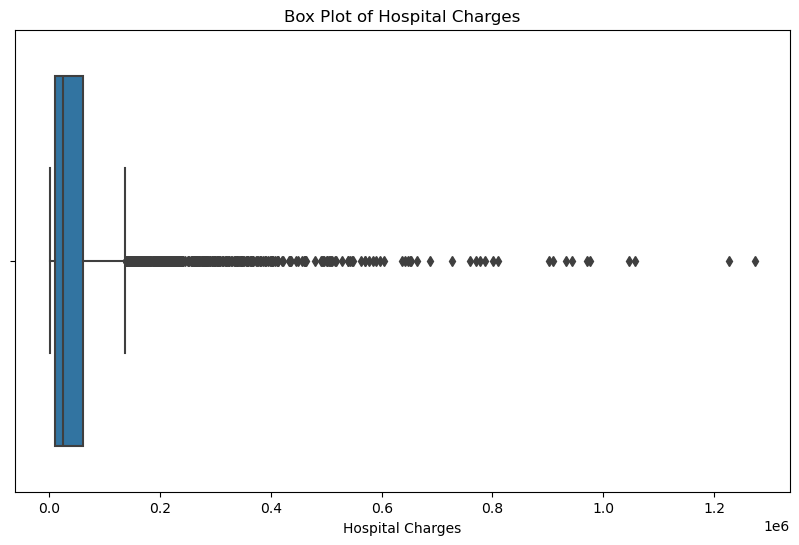

In [8]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=df["charges"])
plt.title("Box Plot of Hospital Charges")
plt.xlabel("Hospital Charges")
plt.show()

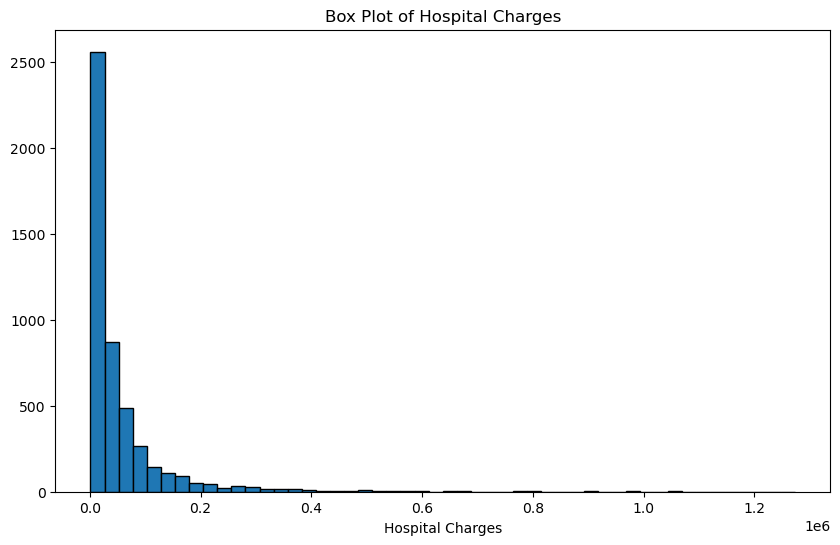

In [9]:
plt.figure(figsize = (10, 6))
plt.hist(x=df["charges"], bins = 50, edgecolor = 'k')
plt.title("Box Plot of Hospital Charges")
plt.xlabel("Hospital Charges")
plt.show()

## Train-Test Split

80-20 split

In [10]:
X = df.drop(columns = ["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

# Multiple Linear Regression

In [11]:
# Fitting the multiple linear regression model
multiple_lm = LinearRegression()
multiple_lm.fit(X_train, y_train)

# predicting using the model

multiple_lm_predictions = multiple_lm.predict(X_test)

# Calculating MAPE of test set
multiple_lm_mape = mean_absolute_percentage_error(y_test, multiple_lm_predictions)
print("Multiple Linear Regression MAPE:", round(multiple_lm_mape, 4))

# Calculating RMSE of test set
multiple_lm_mse = mean_squared_error(y_test, multiple_lm_predictions)
multiple_lm_rmse = np.sqrt(multiple_lm_mse)
multiple_lm_mae = mean_absolute_error(y_test, multiple_lm_predictions)
print("Multiple Linear Regression MSE:", round(multiple_lm_mse, 4))
print("Multiple Linear Regression RMSE:", round(multiple_lm_rmse, 4))
print("Multiple Linear Regression MAE:", round(multiple_lm_mae, 4))

Multiple Linear Regression MAPE: 1.1111
Multiple Linear Regression MSE: 4039691515.6598
Multiple Linear Regression RMSE: 63558.5676
Multiple Linear Regression MAE: 28802.9501


## Coefficients

In [12]:
predictor_names = X.columns
mult_lm_coeffs = multiple_lm.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, mult_lm_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key=lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -72547.5827
race_black: -36512.1792
race_white: -32774.2696
dzgroup_mosf_w_malig: -19634.7874
dzclass_coma: -19576.8343
dzgroup_coma: -19576.8343
diabetes: -13251.2444
sfdm2_sip>=30: -10902.4679
dzgroup_cirrhosis: -9845.8882
dnr_no_dnr: -9004.6562
death: -8745.9199
dementia: -8498.0692
dzgroup_lung_cancer: -7120.7487
dzclass_cancer: -5481.1773
sfdm2_no_m2_and_sip_pres_: -4867.0056
dzclass_copd_chf_cirrhosis: -4759.4896
sfdm2_adl>=4_>=5_if_sur_: -4475.6752
sex_male: -1962.0965
hospdead: -1646.5927
sps: -1327.2213
dzgroup_copd: -1228.1049
adlsc: -1037.6818
age: -578.6269
ca_yes: -394.3797
wblc: -223.6599
meanbp: -98.8707
d_time: -6.9141
hrt: 6.3516
resp: 148.9341
scoma: 222.2828
sod: 253.1948
aps: 376.4915
dnrday: 998.4913
avtisst: 1151.9061
crea: 1328.1432
slos: 1384.0378
prg2m: 1405.0711
temp: 1551.8495
dzgroup_colon_cancer: 1639.5714
edu: 2011.3358
dnr_dnr_before_sadm: 2329.8153
race_hispanic: 2559.7524
hday: 3519.2704
num_co: 4111.6120
ca_no: 6063.9636
dzgroup_chf: 6314.5035


We can see here, by the coefficient values, the signifiance given to each predictor as determined by multiple linear regression.

**MORE INFERNCE LATER**

## Residual Plot

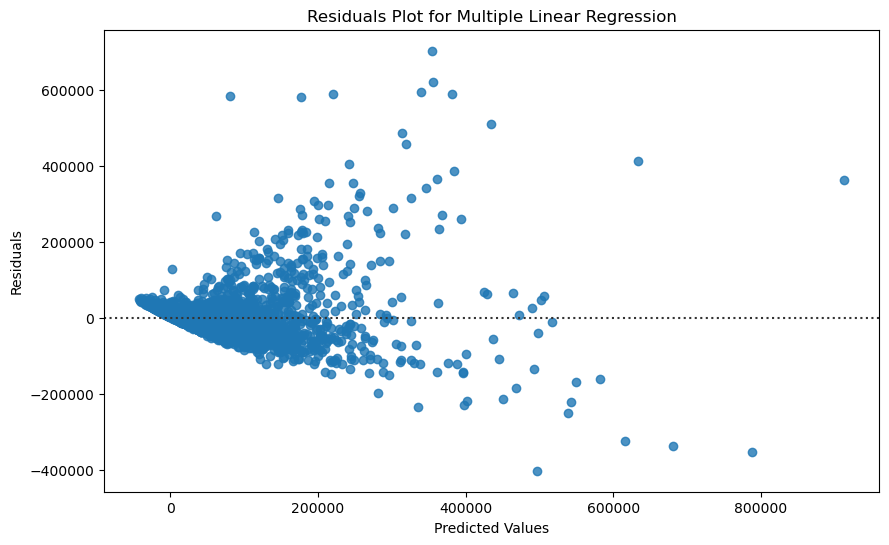

In [13]:
multiple_lm_train_predictions = multiple_lm.predict(X_train)
train_residuals = y_train - multiple_lm_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=multiple_lm_train_predictions, y=train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Multiple Linear Regression")

mult_resid_plot_path = os.path.join(plots_dir, 'mult_resid_plot.png')
plt.savefig(mult_resid_plot_path)
plt.show()

In [14]:
errors = y_test - multiple_lm_predictions

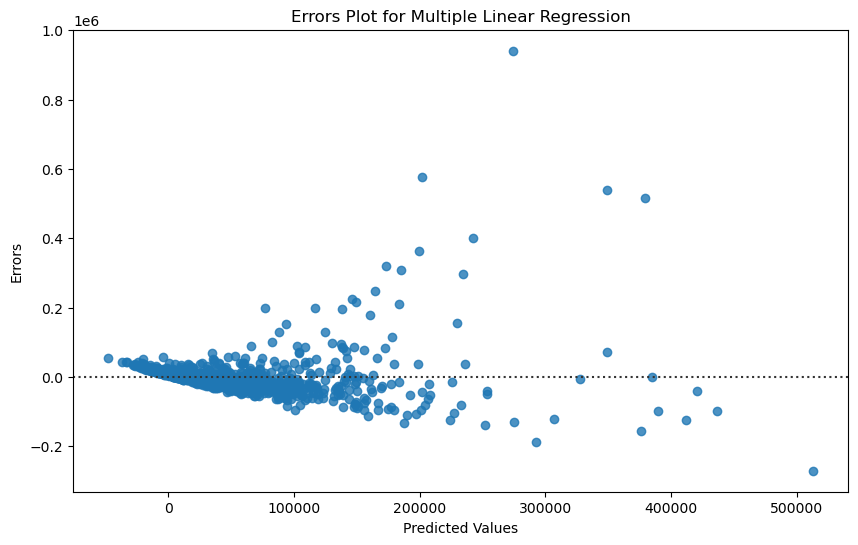

In [15]:

plt.figure(figsize = (10, 6))
sns.residplot(x=multiple_lm_predictions, y=errors)
plt.xlabel("Predicted Values")
plt.ylabel("Errors")
plt.title("Errors Plot for Multiple Linear Regression")

mult_error_plot_path = os.path.join(plots_dir, 'mult_error_plot.png')
plt.savefig(mult_error_plot_path)
plt.show()

This residual plot violates heteroskedascity of residuals. It has a "megaphone" shape which suggests that **weighted least** squares may be used as a remedial measure. This megaphone structure is also displayed in the test set (errors plot).

## Weighted Least Squares

1. Regress absolute residuals from the unweighted OLS regression model on the predictors
2. The estimated standard deviation function is the regressed residuals from step 1. Use these to calculate the weight matrix (nxn)
3. Calculate the WLS estimators using the normal equations of WLS 
$$b_w = (X'WX)^{-1}X'WY$$

In [16]:
residuals_ols = LinearRegression()
residuals_ols.fit(X_train, np.abs(train_residuals))

predicted_abs_residuals = residuals_ols.predict(X_train)
print(predicted_abs_residuals)

[ 1029.8227 30290.0597 12032.2755 ...  8828.6637 30718.7046 15736.8508]


In [17]:
# Calculating WLS by hand

weights = 1 / predicted_abs_residuals
weight_matrix = np.diag(weights)

n_train = len(y_train)

X_np = X_train.to_numpy()
ones = np.ones((n_train, 1))
# X_matrix is using the training data
X_matrix = np.hstack((ones, X_np))
Y_matrix = y_train.to_numpy()

# formula for wls coefficients b using normal equations
# XtWX_inv = np.linalg.inv(X_matrix.T.dot(weight_matrix).dot(X_matrix))
# b_wls = XtWX_inv.dot(X_matrix.T).dot(weight_matrix).dot(Y_matrix)
# b_wls

XtWX = X_matrix.T.dot(weight_matrix).dot(X_matrix)
XtWY = X_matrix.T.dot(weight_matrix).dot(Y_matrix)
b_wls = np.linalg.solve(XtWX, XtWY)
b_wls

array([-2.4428e+06, -6.0794e+03,  1.5076e+05,  1.7021e+05,  1.1979e+03,
        8.3170e+01, -1.4162e+04,  1.2188e+04,  1.3480e+03, -4.0779e+03,
        9.3576e+03,  4.9953e+02,  9.5900e+05, -6.9699e+05,  3.0564e+03,
       -1.0268e+05,  3.0184e+05, -2.2584e+05,  2.5260e+05,  2.1000e+03,
       -3.6827e+02,  5.4653e+02, -7.8967e+02,  6.4552e+02,  4.2859e+04,
        2.1079e+03,  5.1192e+03, -1.1363e+04,  1.8912e+04, -2.0661e+05,
       -2.2316e+05, -2.5558e+05, -1.3484e+06, -7.9209e+20, -1.3443e+06,
       -2.3634e+04,  2.2064e+05,  1.2670e+06,  7.9209e+20, -7.5948e+04,
       -8.9846e+04, -1.2996e+05,  2.9223e+04,  1.5500e+04,  4.0249e+04,
        3.9738e+04,  1.9451e+04, -3.1302e+04,  3.4482e+04])

In [18]:
n_test = len(y_test)
ones_test = np.ones((n_test, 1))

X_test_np = X_test.to_numpy()
X_test_matrix = np.hstack((ones_test, X_test))

y_wls_predictions = X_test_matrix.dot(b_wls)
y_wls_predictions

array([-6.3598e+02,  8.5804e+04, -8.8299e+04,  3.3242e+05,  7.7266e+04,
       -7.8755e+04,  1.1954e+05, -1.1906e+05, -6.2809e+04,  1.7536e+05,
       -2.3585e+05, -9.9147e+04, -6.5450e+04,  3.9133e+05,  3.2577e+05,
       -5.6316e+04, -9.4035e+04, -1.1244e+05, -6.1701e+04, -2.6188e+05,
        1.3985e+05,  7.9112e+04, -2.5716e+05,  1.5410e+05,  5.0889e+05,
       -3.1127e+04,  1.1180e+05, -1.7106e+05,  1.6454e+05, -1.5942e+04,
        6.3794e+04, -1.8202e+05,  2.4112e+05, -2.4718e+04,  2.0623e+05,
        9.1535e+04,  1.0604e+05,  7.7155e+03, -2.1274e+05, -5.9390e+04,
       -2.4013e+05,  3.0115e+05,  1.4860e+05,  6.8453e+04, -7.0968e+04,
        4.4452e+04,  3.9788e+04,  2.8089e+05,  2.5878e+05,  1.3992e+05,
        2.0470e+05,  7.7795e+04,  1.1917e+05,  2.0849e+05,  1.5232e+05,
        6.8231e+04, -2.3312e+05,  1.8565e+05,  3.4265e+05, -2.9949e+05,
       -2.7990e+04, -1.1707e+05,  1.7485e+05,  1.8127e+05,  8.7036e+04,
        1.0811e+05,  2.2606e+05, -5.6391e+04, -3.3784e+04, -2.69

In [19]:
y_test.dtypes

dtype('float64')

In [21]:
# Calculating MAPE of test set
wls_mape = mean_absolute_percentage_error(y_test, y_wls_predictions)
print("Multiple Linear Regression MAPE:", round(wls_mape, 4))

# Calculating RMSE of test set
wls_mse = mean_squared_error(y_test, y_wls_predictions)
wls_rmse = np.sqrt(wls_mse)
wls_mae = mean_absolute_error(y_test, y_wls_predictions)
print("Multiple Linear Regression (WLS) MSE:", round(wls_mse, 4))
print("Multiple Linear Regression (WLS) RMSE:", round(wls_rmse, 4))
print("Multiple Linear Regression (WLS) MAE", round(wls_mae, 4))

Multiple Linear Regression MAPE: 9.865
Multiple Linear Regression (WLS) MSE: 36233707585.7768
Multiple Linear Regression (WLS) RMSE: 190351.5369
Multiple Linear Regression (WLS) MAE 150185.7444


Using **Weighted Least Squares** instead of Ordinary Least Squares does not seem to have helped the predictive power

### WLS Residual Plot

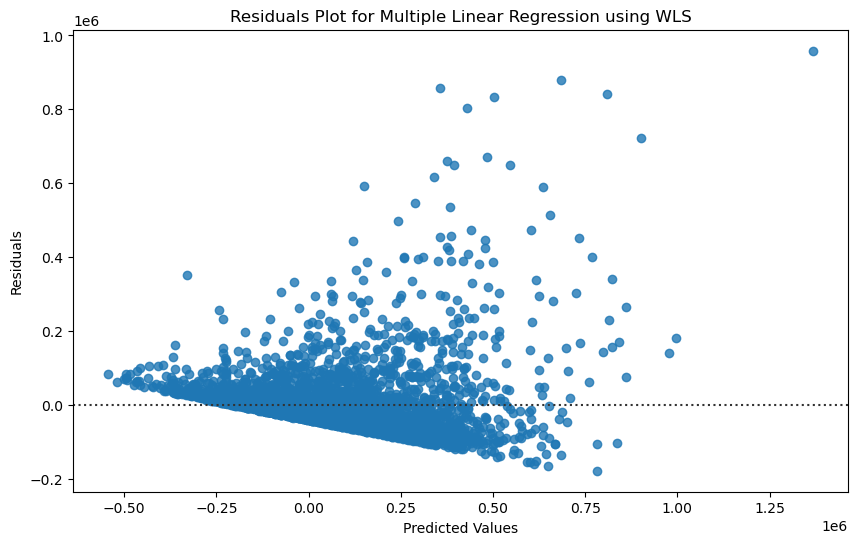

In [22]:
y_train_matrix = y_train.to_numpy()
wls_train_predictions = X_matrix.dot(b_wls)
wls_train_residuals = y_train_matrix - wls_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=wls_train_predictions, y=wls_train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Multiple Linear Regression using WLS")

wls_resid_plot_path = os.path.join(plots_dir, 'wls_resid_plot.png')
plt.savefig(wls_resid_plot_path)
plt.show()

## Log Transformation

In [23]:
# Performing a log transform of the dependent variable y (charges)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

multiple_lm_log = LinearRegression()
multiple_lm_log.fit(X_train, y_train_log)

log_lm_pred = np.exp(multiple_lm_log.predict(X_test))

# Calculating MAPE of test set
log_lm_mape = mean_absolute_percentage_error(y_test, log_lm_pred)
print("Log Multiple Linear Regression MAPE:", round(log_lm_mape, 4))

# Calculating RMSE of test set
log_lm_mse = mean_squared_error(y_test, log_lm_pred)
log_lm_rmse = np.sqrt(log_lm_mse)
log_lm_mae = mean_absolute_error(y_test, log_lm_pred)
print("Log Multiple Linear Regression MSE:", round(log_lm_mse, 4))
print("Log Multiple Linear Regression RMSE:", round(log_lm_rmse, 4))
print("Log Multiple Linear Regression MAE:", round(log_lm_mae, 4))

Log Multiple Linear Regression MAPE: 0.5275
Log Multiple Linear Regression MSE: 10950762929.0093
Log Multiple Linear Regression RMSE: 104645.893
Log Multiple Linear Regression MAE: 30461.6252


### Log Residual Plot

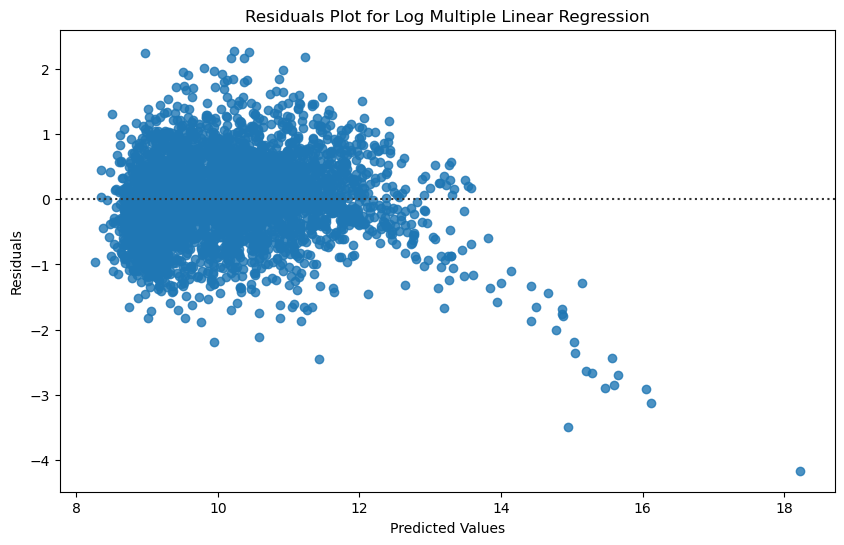

In [24]:
log_lm_train_predictions = multiple_lm_log.predict(X_train)
log_train_residuals = y_train_log - log_lm_train_predictions

plt.figure(figsize = (10, 6))
sns.residplot(x=log_lm_train_predictions, y=log_train_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Log Multiple Linear Regression")

log_mult_resid_plot_path = os.path.join(plots_dir, 'log_mult_resid_plot.png')
plt.savefig(log_mult_resid_plot_path)
plt.show()

Residual plot looks much better when catering to assumptions although there are still outliers

# Lasso Regression

In [25]:
# Fitting lasso regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value

min_alpha = 1e-4
max_alpha = 1e4
n_alphas = 1000
# we will use logspace for the set of the alphas to be tested because it ensures more alpha values at the smaller end of the scale
# and less alphas at the higher end of the scale
alphas = np.logspace(np.log10(min_alpha), np.log10(max_alpha), n_alphas)

lasso_cv = LassoCV(cv = 10, alphas = alphas, random_state = 32, n_jobs = -1).fit(X_train, y_train) # n_jobs allows for parallel processing (uses all available CPU cores)

# alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_
mean_mse = mse_path.mean(axis = 1)

In [26]:
lasso_cv.alpha_

28.408836901833013

The optimal alpha through lasso cross-validation was 26.628

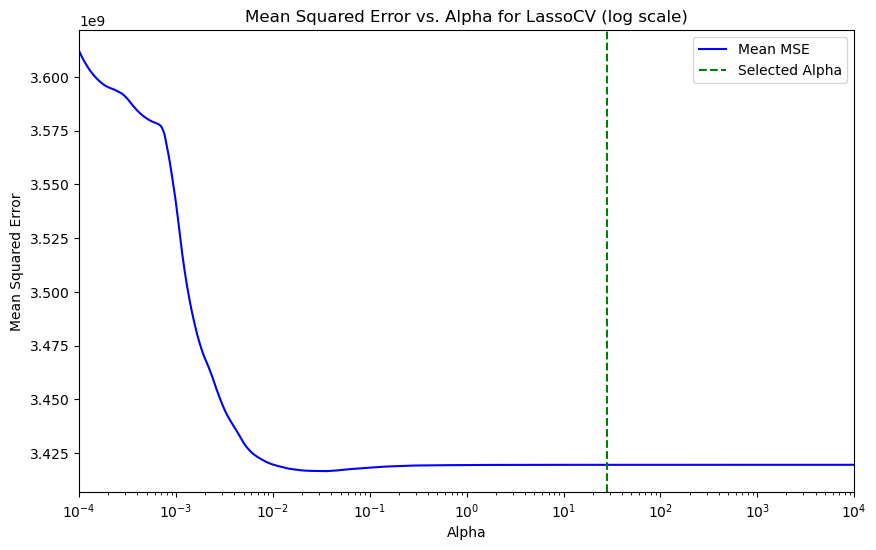

In [27]:

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_mse, linestyle='-', color='b', label='Mean MSE')
plt.axvline(lasso_cv.alpha_, color='g', linestyle='--', label='Selected Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha for LassoCV (log scale)')
plt.legend()
plt.xscale('log')
plt.xlim(min_alpha, max_alpha)

lasso_alpha_mse_plot_path = os.path.join(plots_dir, 'lasso_alpha_mse.png')
plt.savefig(lasso_alpha_mse_plot_path)
plt.show()


## Coefficients

In [28]:
predictor_names = X.columns
lasso_coeffs = lasso_cv.coef_

predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, lasso_coeffs)}
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key = lambda item: item[1]))

for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -42269.5760
dzgroup_coma: -35303.6279
race_black: -34128.9730
race_white: -30506.3538
dzgroup_mosf_w_malig: -19002.7616
diabetes: -12865.5817
sfdm2_sip>=30: -9497.2400
dnr_no_dnr: -9053.9573
death: -8353.3913
dzgroup_cirrhosis: -7852.5795
dementia: -7123.8768
dzgroup_lung_cancer: -6320.5310
sfdm2_no_m2_and_sip_pres_: -3841.3546
dzclass_copd_chf_cirrhosis: -3778.2350
dzclass_coma: -3584.2758
sfdm2_adl>=4_>=5_if_sur_: -3259.2277
sex_male: -1859.4168
sps: -1280.1364
hospdead: -1148.5997
adlsc: -1040.0542
age: -555.8913
dzgroup_copd: -426.2427
wblc: -226.2206
meanbp: -96.5220
ca_yes: -40.2308
d_time: -7.0286
surv2m: 0.0000
dzgroup_colon_cancer: 0.0000
dzclass_cancer: -0.0000
hrt: 8.4271
resp: 150.8363
scoma: 213.1909
sod: 244.8251
aps: 373.8187
dnrday: 996.1437
prg2m: 1028.8365
avtisst: 1155.4453
crea: 1342.0919
slos: 1389.8996
dnr_dnr_before_sadm: 1396.5872
temp: 1554.5646
edu: 2017.3555
hday: 3526.8982
num_co: 4013.6278
race_hispanic: 4022.0746
ca_no: 5854.8420
dzgroup_chf: 6306.

We can see here, by the coefficient values, the signifiance given to each predictor as determined by lasso regularization. This is a stark contrast to the coefficents from multiple linear regression. 

Coefficients with a value of 0 were deduced to be insignificant to the model and thus removed. Only 3 predictors were removed.

## Evaluating Performance

In [29]:
lasso_predictions = lasso_cv.predict(X_test)

# Calculating MAPE of test set
lasso_mape = mean_absolute_percentage_error(y_test, lasso_predictions)
print("Lasso Regression MAPE:", round(lasso_mape, 4))

# Calculating RMSE of test set
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso Regression MSE:", round(lasso_mse, 4))
print("Lasso Regression RMSE:", round(lasso_rmse, 4))


Lasso Regression MAPE: 1.085
Lasso Regression MSE: 4035327007.5264
Lasso Regression RMSE: 63524.2238


Better MAPE but worse RMSE

# Ridge Regression

In [30]:
# Fitting ridge regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value
ridge = Ridge()
param_grid = {'alpha': alphas}

# using neg_mean_squared_error 
ridge_cv = GridSearchCV(ridge, cv = 10, param_grid = param_grid, scoring = 'neg_mean_squared_error', n_jobs = -1) # no random state, same aplhas range for lasso
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.0000e-04, 1.0186e-04, 1.0376e-04, 1.0569e-04, 1.0765e-04,
       1.0966e-04, 1.1170e-04, 1.1378e-04, 1.1589e-04, 1.1805e-04,
       1.2025e-04, 1.2249e-04, 1.2477e-04, 1.2709e-04, 1.2945e-04,
       1.3186e-04, 1.3432e-04, 1.3682e-04, 1.3936e-04, 1.4196e-04,
       1.4460e-04, 1.4729e-04, 1.5003e-04, 1.5282e-04, 1.5567e-04,
       1...
       5.8582e+03, 5.9673e+03, 6.0783e+03, 6.1914e+03, 6.3067e+03,
       6.4240e+03, 6.5436e+03, 6.6654e+03, 6.7894e+03, 6.9158e+03,
       7.0445e+03, 7.1756e+03, 7.3091e+03, 7.4451e+03, 7.5837e+03,
       7.7248e+03, 7.8686e+03, 8.0150e+03, 8.1642e+03, 8.3161e+03,
       8.4709e+03, 8.6285e+03, 8.7891e+03, 8.9527e+03, 9.1193e+03,
       9.2890e+03, 9.4618e+03, 9.6379e+03, 9.8173e+03, 1.0000e+04])},
             scoring='neg_mean_squared_error')

In [31]:
ridge_best_alpha = ridge_cv.best_params_['alpha'] # best alpha value chosen
ridge_best_alpha

4.838209664925957

The best alpha parameter chosen from 10 fold cross validation was 4.175 based on MSE scoring criteria

In [32]:
ridge_mean_mse = -ridge_cv.cv_results_["mean_test_score"]

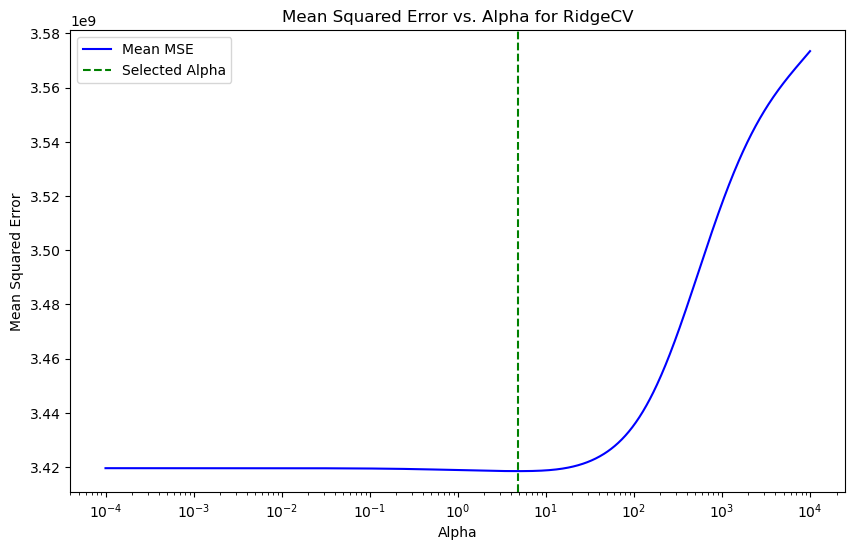

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mean_mse,linestyle='-', color='b', label='Mean MSE')
plt.axvline(ridge_best_alpha, color='g', linestyle='--', label='Selected Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Alpha for RidgeCV')
plt.legend()
plt.xscale('log')

ridge_alpha_mse_plot_path = os.path.join(plots_dir, 'ridge_alpha_mse.png')
plt.savefig(ridge_alpha_mse_plot_path)
plt.show()

## Coefficients

In [34]:
# Access the best estimator
best_ridge = ridge_cv.best_estimator_

# Get the coefficients
ridge_coeffs = best_ridge.coef_

# Map coefficients to predictor names
predictor_names = X.columns
predictor_coefs = {predictor: coef for predictor, coef in zip(predictor_names, ridge_coeffs)}

# Sort the coefficients
sorted_predictor_coefs = dict(sorted(predictor_coefs.items(), key=lambda item: item[1]))

# Print the sorted coefficients
for predictor, coef in sorted_predictor_coefs.items():
    print(f"{predictor}: {coef:.4f}")

surv6m: -38686.8652
race_black: -31390.0383
race_white: -27835.1947
dzclass_coma: -19436.4096
dzgroup_coma: -19436.4096
dzgroup_mosf_w_malig: -18868.0669
diabetes: -13146.9571
sfdm2_sip>=30: -10679.9076
dnr_no_dnr: -9229.8798
death: -8537.2116
dzgroup_cirrhosis: -8388.5341
dementia: -7960.8829
sfdm2_no_m2_and_sip_pres_: -4906.2767
sfdm2_adl>=4_>=5_if_sur_: -4328.1656
dzgroup_lung_cancer: -4262.8308
dzclass_copd_chf_cirrhosis: -3501.3604
surv2m: -2108.9559
hospdead: -2010.6512
sex_male: -1984.8776
dzclass_cancer: -1704.2315
sps: -1256.4445
dzgroup_copd: -1127.8119
adlsc: -1044.3092
age: -547.1169
ca_yes: -318.1737
wblc: -225.4472
meanbp: -96.7397
d_time: -7.0117
hrt: 9.0448
resp: 150.5459
scoma: 219.0522
sod: 242.7337
aps: 376.3021
dnrday: 1001.1273
avtisst: 1158.0741
crea: 1347.5778
slos: 1387.7691
temp: 1570.4946
edu: 2028.8185
dnr_dnr_before_sadm: 2274.4674
prg2m: 2300.5619
dzgroup_colon_cancer: 2558.5993
hday: 3530.6392
num_co: 4109.1108
ca_no: 5837.5200
dzgroup_chf: 6014.9855
race_

These Ridge coefficients, surprisingly, are very similar to the coefficients from Lasso Regression

## Evaluating Performance

In [35]:
ridge_predictions = ridge_cv.predict(X_test)

# Calculating MAPE of test set
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)
print("Ridge Regression MAPE:", round(ridge_mape, 4))

# Calculating MSE & RMSE of test set
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)

print("Ridge Regression MSE:", round(ridge_mse, 4))
print("Ridge Regression RMSE:", round(ridge_rmse, 4))


Ridge Regression MAPE: 1.0936
Ridge Regression MSE: 4037233963.7598
Ridge Regression RMSE: 63539.2317


# Elastic Net

In [36]:
# Fitting Elastic Net regression. 10 Fold cross validation is automatically performed to select best alpha (hyperparameter) value 
# and l1_ratio
l1_ratio = np.linspace(0.1, 1, 100)

enet_cv = ElasticNetCV(l1_ratio = l1_ratio, cv = 10, random_state = 32)
enet_cv.fit(X_train, y_train)

# mse_path = enet_cv.mse_path_
# mean_mse_path = mse_path.mean(axis = 1)


ElasticNetCV(cv=10,
             l1_ratio=array([0.1   , 0.1091, 0.1182, 0.1273, 0.1364, 0.1455, 0.1545, 0.1636,
       0.1727, 0.1818, 0.1909, 0.2   , 0.2091, 0.2182, 0.2273, 0.2364,
       0.2455, 0.2545, 0.2636, 0.2727, 0.2818, 0.2909, 0.3   , 0.3091,
       0.3182, 0.3273, 0.3364, 0.3455, 0.3545, 0.3636, 0.3727, 0.3818,
       0.3909, 0.4   , 0.4091, 0.4182, 0.4273, 0.4364, 0.4455, 0.4545,
       0.4636, 0.4727, 0.4818, 0.4909, 0.5   , 0.5091, 0.5182, 0...
       0.5364, 0.5455, 0.5545, 0.5636, 0.5727, 0.5818, 0.5909, 0.6   ,
       0.6091, 0.6182, 0.6273, 0.6364, 0.6455, 0.6545, 0.6636, 0.6727,
       0.6818, 0.6909, 0.7   , 0.7091, 0.7182, 0.7273, 0.7364, 0.7455,
       0.7545, 0.7636, 0.7727, 0.7818, 0.7909, 0.8   , 0.8091, 0.8182,
       0.8273, 0.8364, 0.8455, 0.8545, 0.8636, 0.8727, 0.8818, 0.8909,
       0.9   , 0.9091, 0.9182, 0.9273, 0.9364, 0.9455, 0.9545, 0.9636,
       0.9727, 0.9818, 0.9909, 1.    ]),
             random_state=32)

In [37]:
l1_ratio

array([0.1   , 0.1091, 0.1182, 0.1273, 0.1364, 0.1455, 0.1545, 0.1636,
       0.1727, 0.1818, 0.1909, 0.2   , 0.2091, 0.2182, 0.2273, 0.2364,
       0.2455, 0.2545, 0.2636, 0.2727, 0.2818, 0.2909, 0.3   , 0.3091,
       0.3182, 0.3273, 0.3364, 0.3455, 0.3545, 0.3636, 0.3727, 0.3818,
       0.3909, 0.4   , 0.4091, 0.4182, 0.4273, 0.4364, 0.4455, 0.4545,
       0.4636, 0.4727, 0.4818, 0.4909, 0.5   , 0.5091, 0.5182, 0.5273,
       0.5364, 0.5455, 0.5545, 0.5636, 0.5727, 0.5818, 0.5909, 0.6   ,
       0.6091, 0.6182, 0.6273, 0.6364, 0.6455, 0.6545, 0.6636, 0.6727,
       0.6818, 0.6909, 0.7   , 0.7091, 0.7182, 0.7273, 0.7364, 0.7455,
       0.7545, 0.7636, 0.7727, 0.7818, 0.7909, 0.8   , 0.8091, 0.8182,
       0.8273, 0.8364, 0.8455, 0.8545, 0.8636, 0.8727, 0.8818, 0.8909,
       0.9   , 0.9091, 0.9182, 0.9273, 0.9364, 0.9455, 0.9545, 0.9636,
       0.9727, 0.9818, 0.9909, 1.    ])

In [38]:
enet_cv.l1_ratio_ # l1_ratio chosen by the fit

1.0

Here `l1_ratio = 1.0` corresponds to pure Lasso reression (L1 Regularization) and `l1_ratio = 0` would be the pure Ridge regression (L2 Regularization). Since `ElasticNetCV` selected `1.0`, it means the model has chosen to use pure lasso regression for the optimal performance which we have already performed

# Principal Components Regression

Principal Component regression entails dimension reduction through the principal components (linear combinations of the predictors) and fitting linear regression.

We will need to standardize the predictors because of the highly varying scales

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

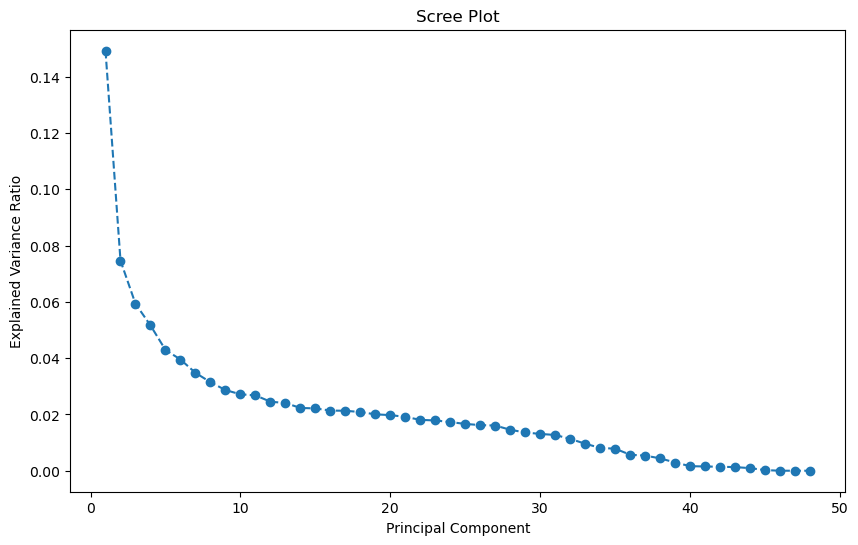

In [40]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize = (10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

scree_plot_path = os.path.join(plots_dir, 'pcr_scree_plot.png')
plt.savefig(scree_plot_path)

plt.show()


The explained variance seems to flatten out after the 38th principal component

In [41]:
plots_dir = 'linear_model_plots'
# if not os.path.exists(plots_dir):
#     os.makedirs(plots_dir)

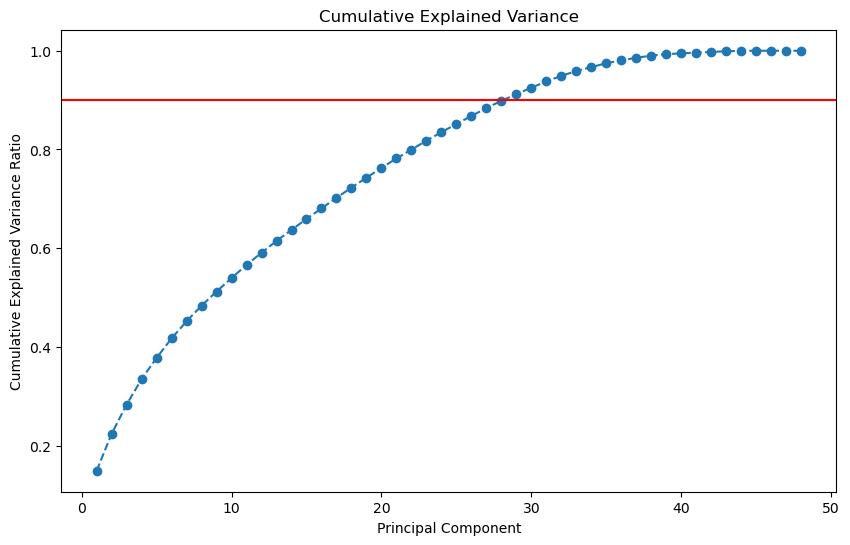

In [42]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')

cumulative_variance_plot_path = os.path.join(plots_dir, 'pcr_cumulative_variance.png')
plt.savefig(scree_plot_path)

plt.show()

The red line represent the cumulative variance of 0.9 which will determine the amount of PC's we use

In [43]:
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
PRINn_components

29

## Fitting PCA

In [40]:
X_train_pca_selected = X_train_pca[:, :n_components]
X_test_pca_selected = X_test_pca[:, :n_components]

regressor = LinearRegression()
regressor.fit(X_train_pca_selected, y_train)

pcr_predictions = regressor.predict(X_test_pca_selected)

# Calculating MAPE of test set
pcr_mape = mean_absolute_percentage_error(y_test, pcr_predictions)
print("PCR Regression MAPE:", pcr_mape)

# Calculating RMSE of test set
pcr_mse = mean_squared_error(y_test, pcr_predictions)
pcr_rmse = np.sqrt(pcr_mse)
print("PCR Regression MSE:", pcr_mse)
print("PCR Regression RMSE:", pcr_rmse)

PCR Regression MAPE: 1.0551790357764699
PCR Regression MSE: 4144394089.9085636
PCR Regression RMSE: 64376.96862938301


# Conclusion

In [42]:
linear_models_scores = {
    'Model': ["Multiple Linear Regression OLS", "Multiple Linear Regression WLS", "Multiple Linear Regression Log Transform", "Lasso Regression", "Ridge Regression", "PCA Regression"],
    'MAPE': [multiple_lm_mape, wls_mape, log_lm_mape, lasso_mape, ridge_mape, pcr_mape],
    'MSE': [multiple_lm_mse, wls_mse, log_lm_mse, lasso_mse, ridge_mse, pcr_mse],
    'RMSE': [multiple_lm_rmse, wls_rmse, log_lm_rmse, lasso_rmse, ridge_rmse, pcr_rmse]
}

linear_scores_df = pd.DataFrame(linear_models_scores).sort_values(by="RMSE")


linear_scores_df

,Model,MAPE,MSE,RMSE
3,Lasso Regression,1.0932,4029300430.2331,63476.7708
4,Ridge Regression,1.1043,4031276068.8201,63492.3308
0,Multiple Linear Regression OLS,1.1278,4035445650.9683,63525.1576
5,PCA Regression,1.0552,4144394089.9086,64376.9686
2,Multiple Linear Regression Log Transform,0.5271,11166635120.2069,105672.3006
1,Multiple Linear Regression WLS,5.0916,14026562954.1093,118433.7914


## Summary

The regression models evaluated—Lasso, Ridge, Ordinary Least Squares (OLS), and PCA Regression—exhibit closely clustered RMSE values ranging from approximately \\$63,476 to \\$64,376. Despite their proximity in performance metrics, the high RMSE magnitudes across all models indicate that they are not effectively capturing the complex dynamics of the dataset, specifically in predicting hospital charges for critically ill patients. This suggests a need to explore more sophisticated approaches, such as non-linear models or advanced machine learning techniques, which might better address the underlying complexities and potential non-linear relationships within the data. 